#GR5072 HW02 Xinyi Shi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1. Peaks**

a) What proportion of peaks is still unclimbed?

In [3]:
peaks = pd.read_csv("data/peaks.csv")

In [4]:
peaks.head()

,peak_id,peak_name,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD,Ama Dablam,Amai Dablang,6814,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
1,AMPG,Amphu Gyabjen,NaN,5630,Climbed,1953.0,UK,AMPG53101
2,ANN1,Annapurna I,NaN,8091,Climbed,1950.0,France,ANN150101
3,ANN2,Annapurna II,NaN,7937,Climbed,1960.0,"UK, Nepal",ANN260101
4,ANN3,Annapurna III,NaN,7555,Climbed,1961.0,India,ANN361101


In [5]:
np.where([peaks['climbing_status'] == 'Unclimbed'],1,0).mean()

0.27136752136752135

Answer: <br>
The proportion of peaks unclimbed is 27.13%.<br>

b) What is the average height of the climbed peaks vs. unclimbed peaks?

In [6]:
col = ['climbing_status','height_metres']

In [7]:
peaks.loc[:,col].groupby('climbing_status').mean()

,height_metres
climbing_status,
Climbed,6706.284457
Unclimbed,6523.330709


Answer: <br>
The average height of the climbed peaks is 6706.28 meters and the average height of the unclimbed peaks is 6523.33 meters.

**2. Sherpas**

In [8]:
members = pd.read_csv("data/members.csv")

In [9]:
members.head()

,expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,...,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Leader,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41.0,France,Deputy Leader,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
2,AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN
3,AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Exp Doctor,...,6000.0,False,False,False,False,NaN,NaN,False,NaN,NaN
4,AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34.0,France,Climber,...,NaN,False,False,False,False,NaN,NaN,False,NaN,NaN


Using the members data only, select a subset of all persons who have a Nepalese citizenship.

In [10]:
members['count'] = 1
Nepalese = members[members['citizenship'] == "Nepal"]

a) What proportion of them was hired for the expedition?

In [11]:
NepaleseHired = Nepalese[Nepalese['expedition_role'] == 'H-A Worker']
(NepaleseHired['count'].sum())/(Nepalese['count'].sum())

0.8849705608924698

Answer:<br>
The proportion of Nepalese members who were hired for expedition is 88.5%.

b) What are their minimum, maximum, and average ages?

In [12]:
Nepalese.describe()

,year,age,highpoint_metres,death_height_metres,injury_height_metres,count
count,16135.000000,14373.000000,14247.000000,297.000000,122.000000,16135.0
mean,2005.505671,32.885062,7878.236190,6059.461279,6886.147541,1.0
std,14.479732,7.746973,987.588329,1277.859557,1116.734982,0.0
min,1921.000000,12.000000,3800.000000,2100.000000,4600.000000,1.0
25%,2002.000000,27.000000,6977.000000,5350.000000,6050.000000,1.0
50%,2010.000000,32.000000,8188.000000,6000.000000,6900.000000,1.0
75%,2015.000000,38.000000,8850.000000,6800.000000,7800.000000,1.0
max,2019.000000,85.000000,8850.000000,8800.000000,8880.000000,1.0


In [13]:
NepaleseHired.describe()

,year,age,highpoint_metres,death_height_metres,injury_height_metres,count
count,14279.000000,12877.000000,13148.000000,213.000000,97.000000,14279.0
mean,2006.776035,32.797701,7902.146562,6449.483568,6845.515464,1.0
std,13.480210,7.679750,974.865263,1036.122906,1081.711964,0.0
min,1921.000000,15.000000,3800.000000,4200.000000,4600.000000,1.0
25%,2004.000000,27.000000,7000.000000,5790.000000,6050.000000,1.0
50%,2010.000000,32.000000,8188.000000,6400.000000,6950.000000,1.0
75%,2015.000000,38.000000,8850.000000,7000.000000,7500.000000,1.0
max,2019.000000,67.000000,8850.000000,8800.000000,8880.000000,1.0


Answer:<br>
The minimum age of all Nepalese members is 12 years old. The maximum age of all Nepalese members is 85 years old. The average age of all Nepalese members is about 33 years old.<br> 
The minimum age of hired Nepalese members is 15. The maximum age of hired Nepalese members is 67. The average age of hired Nepalese members is about 33 years old.

**3. Gender**

Now use all three data sets and join them on the provided ID variables. For this question, limit yourself to the subset of non-hired participants.

In [14]:
expeditions = pd.read_csv("data/expeditions.csv")

In [15]:
t1 = pd.merge(expeditions,peaks,how = 'left',on = 'peak_id')

In [16]:
non_hired = members[members['hired'] == False]

In [17]:
t2 = pd.merge(non_hired,t1,how = "left", on = "expedition_id")

a) What is the first record of a woman summitting a peak? Which peak (name and height in meters) was that?

In [18]:
selected_members = members[['expedition_id','peak_name','year','sex','expedition_role','highpoint_metres','success']].drop_duplicates()
female_members = selected_members[selected_members['sex'] == "F" ]
female_members_success = female_members[female_members['success'] == True ]
female_members_success.head(2)

,expedition_id,peak_name,year,sex,expedition_role,highpoint_metres,success
108,AMAD82101,Ama Dablam,1982,F,Climber,6814.0,True
110,AMAD82101,Ama Dablam,1982,F,Leader,6814.0,True


In [19]:
female_members_success.sort_values(by = ['year']).head()

,expedition_id,peak_name,year,sex,expedition_role,highpoint_metres,success
31468,DZAN49101,Dzanye,1949,F,Climber,6719.0,True
24739,TENG49101,Tengkoma,1949,F,Climber,6215.0,True
22264,GAN155301,Ganesh I,1955,F,Climber,7422.0,True
22230,LEOE55101,Leonpo Gang East,1955,F,Leader,6733.0,True
22232,LEOE55101,Leonpo Gang East,1955,F,Climber,6733.0,True


Answer:<bk>
There first record of a woman summitting a peak is in the year 1949. There were two expeditions made by women in 1949, and the corresponding peaks and peak height are Dzanye(6719 meters) and Tengkoma(6215 meters).

b) Provide a single cross-tab table of the sex of an expedition participant and - the proportion of success in summitting a main peak or sub-peak
- the proportion of participants using oxygen support - the proportion of participants who died.

That is, sex should be displayed as the rows of the output and the three requested proportions as its columns.

In [20]:
t2.head(2)

,expedition_id,member_id,peak_id_x,peak_name,year_x,season_x,sex,age,citizenship,expedition_role,...,hired_staff_deaths,oxygen_used_y,trekking_agency,peak_name_y,peak_alternative_name,height_metres,climbing_status,first_ascent_year,first_ascent_country,first_ascent_expedition_id
0,AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40.0,France,Leader,...,0,False,NaN,Ama Dablam,Amai Dablang,6814.0,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101
1,AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41.0,France,Deputy Leader,...,0,False,NaN,Ama Dablam,Amai Dablang,6814.0,Climbed,1961.0,"New Zealand, USA, UK",AMAD61101


In [21]:
t2.loc[:,['sex','success','oxygen_used_y','hired_staff_deaths']].groupby('sex').mean()

,success,oxygen_used_y,hired_staff_deaths
sex,,,
F,0.326583,0.373788,0.039932
M,0.312743,0.355139,0.055914


Answer:<bk>
The cross-tab table is shown above. 

**4. Accidents**

For this question, use the expeditions data only.

a) Aggregate the data by decade and count the number of expeditions, the total number of expedition members, and the average rates of death for members and hired staff. Briefly describe what you found.

In [22]:
expeditions = pd.read_csv("data/expeditions.csv")
expeditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10364 entries, 0 to 10363
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   expedition_id       10364 non-null  object 
 1   peak_id             10364 non-null  object 
 2   peak_name           10363 non-null  object 
 3   year                10364 non-null  int64  
 4   season              10364 non-null  object 
 5   basecamp_date       9269 non-null   object 
 6   highpoint_date      9714 non-null   object 
 7   termination_date    7984 non-null   object 
 8   termination_reason  10364 non-null  object 
 9   highpoint_metres    9950 non-null   float64
 10  members             10364 non-null  int64  
 11  member_deaths       10364 non-null  int64  
 12  hired_staff         10364 non-null  int64  
 13  hired_staff_deaths  10364 non-null  int64  
 14  oxygen_used         10364 non-null  bool   
 15  trekking_agency     8784 non-null   object 
dtypes: b

In [23]:
expeditions['decade'] = np.floor(expeditions['year']//10)*10
expeditions['count'] = 1
expeditions.sort_values(by = ['decade']).head()

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency,decade,count
2864,KABN07301,KABN,Kabru North,1907,Autumn,NaN,NaN,NaN,"Bad weather (storms, high winds)",7270.0,2,0,0,0,False,NaN,1900.0,1
2882,KANG05201,KANG,Kangchenjunga,1905,Summer,NaN,1905-09-01,NaN,Accident (death or serious injury),6300.0,5,1,4,4,False,NaN,1900.0,1
2854,JONG09301,JONG,Jongsang,1909,Autumn,NaN,NaN,NaN,Other,NaN,1,0,0,0,False,NaN,1900.0,1
2947,LNPO09301,LNPO,Langpo,1909,Autumn,NaN,1909-09-14,NaN,Success (main peak),6965.0,1,0,0,0,False,NaN,1900.0,1
2883,KANG10101,KANG,Kangchenjunga,1910,Spring,NaN,NaN,NaN,Did not attempt climb,NaN,1,0,0,0,False,NaN,1910.0,1


In [24]:
valid_expeditions = expeditions.loc[(expeditions["hired_staff_deaths"] <= expeditions['hired_staff']) ]

In [25]:
valid_expeditions.groupby('decade').agg({'count':'sum','members':'sum','member_deaths':'mean','hired_staff_deaths':'mean'}) 

,count,members,member_deaths,hired_staff_deaths
decade,,,,
1900.0,4,9,0.250000,1.000000
1910.0,3,3,0.000000,0.000000
1920.0,10,51,0.400000,1.000000
1930.0,34,152,0.058824,0.117647
1940.0,15,53,0.000000,0.000000
1950.0,168,856,0.095238,0.053571
1960.0,160,973,0.137500,0.056250
1970.0,359,3465,0.264624,0.142061
1980.0,1184,9993,0.168074,0.036318


Answer:<br>The number of expeditions and members are on the increase since the 1900s. The death rate of members and hired staffs are generally decreasing since the 1900s. If we compare the death rate of members and hired staffs in the same decade, we can see that in most cases members' death rate is higher than that of the hired staff.

b) Calculate the length_of_expedition as the time between the basecamp_date and the termination_date in days. Now, standardize these length_of_expedition values to z-values grouped by each peak (that is you need to standardize with the mean and standard deviation of expeditions for the same peak only). Are longer expeditions more or less likely to be associated with death? (no statistical test necessary)

In [26]:
expeditions['basecamp_date'] = pd.to_datetime(expeditions['basecamp_date'])

In [27]:
expeditions['termination_date'] = pd.to_datetime(expeditions['termination_date'])

In [28]:
expeditions.head()

,expedition_id,peak_id,peak_name,year,season,basecamp_date,highpoint_date,termination_date,termination_reason,highpoint_metres,members,member_deaths,hired_staff,hired_staff_deaths,oxygen_used,trekking_agency,decade,count
0,ANN260101,ANN2,Annapurna II,1960,Spring,1960-03-15,1960-05-17,NaT,Success (main peak),7937.0,10,0,9,0,True,NaN,1960.0,1
1,ANN269301,ANN2,Annapurna II,1969,Autumn,1969-09-25,1969-10-22,1969-10-26,Success (main peak),7937.0,10,0,0,0,False,NaN,1960.0,1
2,ANN273101,ANN2,Annapurna II,1973,Spring,1973-03-16,1973-05-06,NaT,Success (main peak),7937.0,6,0,8,0,False,NaN,1970.0,1
3,ANN278301,ANN2,Annapurna II,1978,Autumn,1978-09-08,1978-10-02,1978-10-05,"Bad weather (storms, high winds)",7000.0,2,0,0,0,False,NaN,1970.0,1
4,ANN279301,ANN2,Annapurna II,1979,Autumn,NaT,1979-10-18,1979-10-20,"Bad weather (storms, high winds)",7160.0,3,0,0,0,False,NaN,1970.0,1


In [29]:
length_of_expedition = (expeditions['termination_date'] - expeditions['basecamp_date']).dt.days

In [30]:
std_loe = (length_of_expedition - length_of_expedition.mean())/(length_of_expedition.std())
expeditions['std_loe'] = std_loe

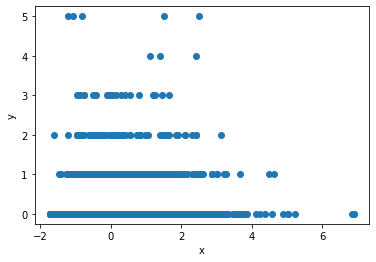

In [31]:
expeditions.head()
import numpy as np

x=expeditions['std_loe']
y=expeditions['member_deaths']
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

I think in general there is a inverse trend.Longer expeditions are less likely to be associated with death.